<a href="https://colab.research.google.com/github/ardilalukita14/PCVK-Genap-21-22/blob/main/Week9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PRAKTIKUM 9**

## **TUGAS PRAKTIKUM**

In [84]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [85]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

Buatlah fungsi dilasi serta tampilkan hasil dilasi pada citra dengan Structuring Element Dilasi (SED) berbentuk square 5 x 5 tanpa menggunakan library morphology dari openCV.

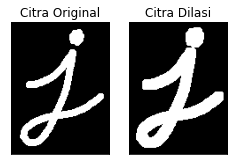

In [86]:
def dilasi_citra(F,w) :            # F mendefinisikan image-nya.       # w mendefinisikan nilai masking

# Menghitung size citra 
  a,b = F.shape
  image_dilasi = np.zeros((a,b), dtype=np.uint8)

  # Generate SED
  SED = np.ones((w, w), dtype=np.uint8)
  constant1 = (w-1)//2

  # Tahapan dalam dilasi
  for i in range(constant1, a-constant1):
    for j in range(constant1, b-constant1):
      temp = F[i-constant1:i+constant1+1, j-constant1:j+constant1+1]
      product = temp * SED
      image_dilasi[i, j] = np.max(product)
  return image_dilasi

image = cv2.imread('/content/drive/MyDrive/Images/j.png',0)
  
ret, thresh = cv2.threshold(image, 127, 225, cv2.THRESH_BINARY)
w = 5
image_dilasi = dilasi_citra(thresh, w)

plt.subplot(131), plt.imshow(image, cmap='gray')
plt.title('Citra Original'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(image_dilasi, cmap='gray')
plt.title('Citra Dilasi'), plt.xticks([]), plt.yticks([])
plt.show()              


Buatlah fungsi erosi serta tampilkan hasil erosi pada citra dengan Structuring Element Erosi (SE) berbentuk square 5 x 5 tanpa menggunakan library morphology dari openCV.

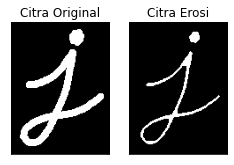

In [87]:
def erosi_citra(F, k):

# Menghitung ukuran gambar atau citra
  p,q = F.shape

  # Melakukan generate SEE
  SEE = np.ones((k,k), dtype=np.uint8)
  constant = (k-1)//2

  image_erosi = np.zeros((p,q), dtype=np.uint8)

  #Proses erosi
  for i in range(constant, p-constant):
    for j in range(constant, q-constant):
      temp= F[i-constant:i+constant+1, j-constant:j+constant+1]
      product = temp*SEE
      image_erosi[i, j] = np.min(product)
  return image_erosi

img_ori = cv2.imread('/content/drive/MyDrive/Images/j.png',0)
ret1, thresh1 = cv2.threshold(img_ori, 127, 225, cv2.THRESH_BINARY)
k=5
image_erosi = erosi_citra(thresh1, k)

plt.subplot(131), plt.imshow(img_ori, cmap='gray')
plt.title('Citra Original'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(image_erosi, cmap='gray')
plt.title('Citra Erosi'), plt.xticks([]), plt.yticks([])
plt.show()  

Buatlah program implementasi operasi dilasi Structuring Element Dilasi (SED) berbentuk square 5 x 5 dengan menggunakan library morphology dari openCV.

[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]


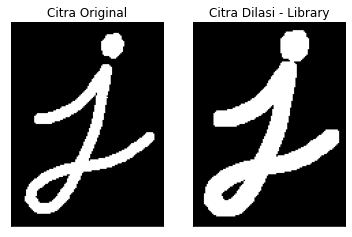

In [88]:
# Dilasi dengan library openCV

# Input image 
image = cv2.imread('/content/drive/MyDrive/Images/j.png',0)


ret, thresh = cv2.threshold(image, 127, 225, cv2.THRESH_BINARY)
kernel = np.ones((5,5), np.uint16)
dilasi_image = cv2.dilate(thresh, kernel, iterations = 1)
print(kernel)

plt.subplot(121), plt.imshow(image, cmap='gray')
plt.title('Citra Original'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(dilasi_image, cmap='gray')
plt.title('Citra Dilasi - Library'), plt.xticks([]), plt.yticks([])
plt.show()  

Buatlah program implementasi operasi dilasi Structuring Element Erosi (SE) berbentuk square 5 x 5 dengan menggunakan library morphology dari openCV.

[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]


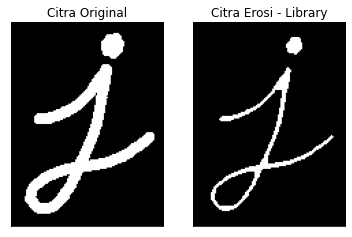

In [89]:
# Mengimplementasikan fungsi erosi dengan library

# Input image 
image = cv2.imread('/content/drive/MyDrive/Images/j.png',0)

kernel= np.ones((5,5), np.uint8)
erosi_image = cv2.erode(image, kernel, iterations = 1)
print(kernel)

plt.subplot(121), plt.imshow(image, cmap='gray')
plt.title('Citra Original'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(erosi_image, cmap='gray')
plt.title('Citra Erosi - Library'), plt.xticks([]), plt.yticks([])
plt.show()  


Buatlah program implementasi operasi opening dengan Structuring Element berbentuk square 7 x 7 tanpa dan dengan menggunakan library morphology dari openCV.

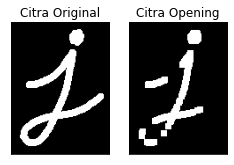

In [90]:
# Operasi Opening dengan SE

# Input image 
image = cv2.imread('/content/drive/MyDrive/Images/j.png',0)

reto, thresho = cv2.threshold(image, 127, 225, cv2.THRESH_BINARY)
k=7

image_opening = dilasi_citra(erosi_citra(thresho,k),k)

plt.subplot(131), plt.imshow(image, cmap='gray')
plt.title('Citra Original'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(image_opening, cmap='gray')
plt.title('Citra Opening'), plt.xticks([]), plt.yticks([])
plt.show()  


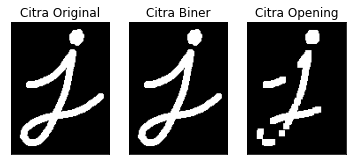

In [91]:
# Operasi Opening dengan SE dengan library

# Input image 
image = cv2.imread('/content/drive/MyDrive/Images/j.png',0)

ret, thresh = cv2.threshold(image, 127, 225, cv2.THRESH_BINARY)
kernel = np.ones((7,7), np.uint8)
opening_image = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)

plt.subplot(131), plt.imshow(image, cmap='gray')
plt.title('Citra Original'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(thresh, cmap='gray')
plt.title('Citra Biner'), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(opening_image, cmap='gray')
plt.title('Citra Opening'), plt.xticks([]), plt.yticks([])
plt.show()  

Buatlah program implementasi operasi closing dengan Structuring Element berbentuk square 7 x 7 tanpa dan dengan menggunakan library morphology dari openCV.

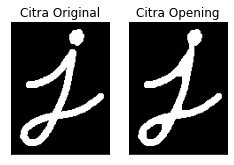

In [92]:
# Operasi Closing dengan SE

# Input image 
image = cv2.imread('/content/drive/MyDrive/Images/j.png',0)

retc, threshc = cv2.threshold(image, 127, 225, cv2.THRESH_BINARY)
k=7

image_closing = erosi_citra(dilasi_citra(threshc,k),k)

plt.subplot(131), plt.imshow(image, cmap='gray')
plt.title('Citra Original'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(image_closing, cmap='gray')
plt.title('Citra Opening'), plt.xticks([]), plt.yticks([])
plt.show()  

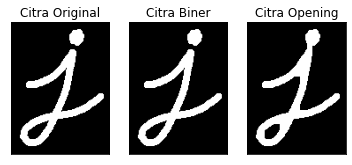

In [93]:
# Operasi Closing dengan SE library

# Input image 
image = cv2.imread('/content/drive/MyDrive/Images/j.png',0)

ret, thresh = cv2.threshold(image, 127, 225, cv2.THRESH_BINARY)
kernel = np.ones((7,7), np.uint8)
closing_image = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

plt.subplot(131), plt.imshow(image, cmap='gray')
plt.title('Citra Original'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(thresh, cmap='gray')
plt.title('Citra Biner'), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(closing_image, cmap='gray')
plt.title('Citra Opening'), plt.xticks([]), plt.yticks([])
plt.show()  

Buatlah program implementasi operasi dilasi dengan Structuring Element berbentuk Cross 3 x 3 dan 5 x 5.


Kernel Cross 3x3
[[0 1 0]
 [1 1 1]
 [0 1 0]]
-----------------
Kernel Cross 5x5
[[0 0 1 0 0]
 [0 0 1 0 0]
 [1 1 1 1 1]
 [0 0 1 0 0]
 [0 0 1 0 0]]
 
 
SED = Cross 3


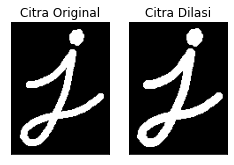

SED = Cross 5


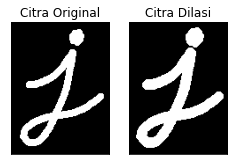

In [94]:
# Dilasi dnegan library openCV

# Input image 
image = cv2.imread('/content/drive/MyDrive/Images/j.png',0)


ret, thresh = cv2.threshold(image, 127, 225, cv2.THRESH_BINARY)
kernel_3X3 = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))
kernel_5X5 = cv2.getStructuringElement(cv2.MORPH_CROSS,(5,5))
dilasi_cross3x3 = cv2.dilate(thresh, kernel_3X3, iterations = 1)
dilasi_cross5x5 = cv2.dilate(thresh, kernel_5X5, iterations = 1)

print("Kernel Cross 3x3")
print(kernel_3X3)
print("-----------------")
print("Kernel Cross 5x5")
print(kernel_5X5)

print(" ")
print(" ")

print("SED = Cross 3")
plt.subplot(131), plt.imshow(image, cmap='gray')
plt.title('Citra Original'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(dilasi_cross3x3, cmap='gray')
plt.title('Citra Dilasi'), plt.xticks([]), plt.yticks([])
plt.show()   

print("SED = Cross 5")
plt.subplot(131), plt.imshow(image, cmap='gray')
plt.title('Citra Original'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(dilasi_cross5x5, cmap='gray')
plt.title('Citra Dilasi'), plt.xticks([]), plt.yticks([])
plt.show()   



Buatlah program implementasi operasi dilasi dengan Structuring Element berbentuk Circular 3 x 3 dan 5 x 5.

Kernel Circle 3x3
[[0 1 0]
 [1 1 1]
 [0 1 0]]
-----------------
Kernel Circle 5x5
[[0 0 1 0 0]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [0 0 1 0 0]]
 
 
SED = Circle 3


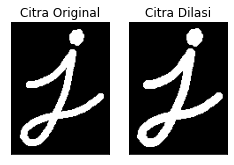

SED = Circle 5


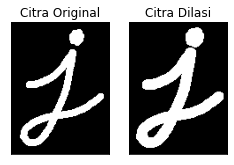

In [95]:
# Dilasi dnegan library openCV

# Input image 
image = cv2.imread('/content/drive/MyDrive/Images/j.png',0)


ret, thresh = cv2.threshold(image, 127, 225, cv2.THRESH_BINARY)
kernel_3X3 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))
kernel_5X5 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
dilasi_circular3x3 = cv2.dilate(thresh, kernel_3X3, iterations = 1)
dilasi_circular5x5 = cv2.dilate(thresh, kernel_5X5, iterations = 1)

print("Kernel Circle 3x3")
print(kernel_3X3)
print("-----------------")
print("Kernel Circle 5x5")
print(kernel_5X5)

print(" ")
print(" ")

print("SED = Circle 3")
plt.subplot(131), plt.imshow(image, cmap='gray')
plt.title('Citra Original'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(dilasi_circular3x3, cmap='gray')
plt.title('Citra Dilasi'), plt.xticks([]), plt.yticks([])
plt.show()   

print("SED = Circle 5")
plt.subplot(131), plt.imshow(image, cmap='gray')
plt.title('Citra Original'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(dilasi_circular5x5, cmap='gray')
plt.title('Citra Dilasi'), plt.xticks([]), plt.yticks([])
plt.show()   



Buatlah program implementasi operasi erosi dengan Structuring Element berbentuk Rectangle 3 x 5 dan 5 x 7

Kernel Rectangle 3x5
[[1 1 1]
 [1 1 1]
 [1 1 1]
 [1 1 1]
 [1 1 1]]
-----------------
Kernel Rectangle 5x7
[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]
 
 
SE = Rectangle 3x5


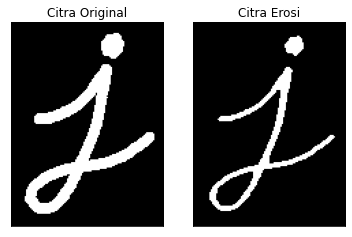

SE = Rectangle 5x7


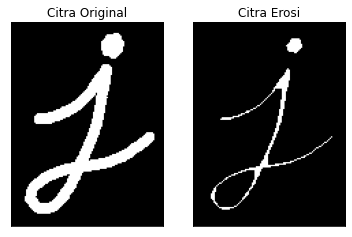

In [96]:
# Mengimplementasikan fungsi erosi dengan library

# Input image 
image = cv2.imread('/content/drive/MyDrive/Images/j.png',0)

kernel_3X5 = cv2.getStructuringElement(cv2.MORPH_RECT,(3,5))
kernel_5X7 = cv2.getStructuringElement(cv2.MORPH_RECT,(5,7))
erosi_rect3X5 = cv2.erode(image, kernel_3X5, iterations = 1)
erosi_rect5x7 = cv2.erode(image, kernel_5X7, iterations = 1)

print("Kernel Rectangle 3x5")
print(kernel_3X5)
print("-----------------")
print("Kernel Rectangle 5x7")
print(kernel_5X7)

print(" ")
print(" ")

print("SE = Rectangle 3x5")
plt.subplot(121), plt.imshow(image, cmap='gray')
plt.title('Citra Original'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(erosi_rect3X5, cmap='gray')
plt.title('Citra Erosi'), plt.xticks([]), plt.yticks([])
plt.show()  

print("SE = Rectangle 5x7")
plt.subplot(121), plt.imshow(image, cmap='gray')
plt.title('Citra Original'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(erosi_rect5x7, cmap='gray')
plt.title('Citra Erosi'), plt.xticks([]), plt.yticks([])
plt.show()  

Buatlah program implementasi operasi erosi dengan Structuring Element berbentuk Line Vertikal 3 dan 5.

SE = Line Vertical 3


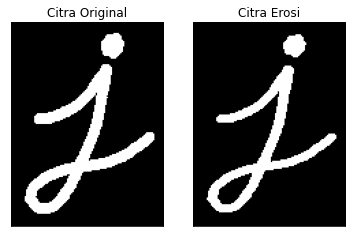

SE = Line Vertical 5


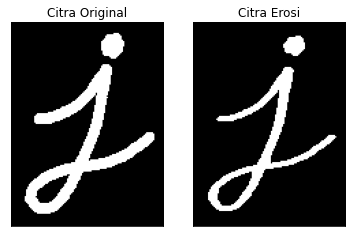

In [97]:
import cv2 as cv

# Mengimplementasikan fungsi erosi dengan library

# Input image 
image = cv2.imread('/content/drive/MyDrive/Images/j.png',0)

image = cv2.threshold(image, 127, 225, cv2.THRESH_BINARY)[1]

vertical_size_3 = 3
vertical_size_5 = 5

verticalStructure_3 = cv2.getStructuringElement(cv2.MORPH_RECT, (1, vertical_size_3))
verticalStructure_5 = cv2.getStructuringElement(cv2.MORPH_RECT, (1, vertical_size_5))

erosi_vertical_3 = cv2.morphologyEx(image, cv2.MORPH_ERODE, verticalStructure_3)
erosi_vertical_5 = cv2.morphologyEx(image, cv2.MORPH_ERODE, verticalStructure_5)

print("SE = Line Vertical 3")
plt.subplot(121), plt.imshow(image, cmap='gray')
plt.title('Citra Original'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(erosi_vertical_3 , cmap='gray')
plt.title('Citra Erosi'), plt.xticks([]), plt.yticks([])
plt.show() 


print("SE = Line Vertical 5")
plt.subplot(121), plt.imshow(image, cmap='gray')
plt.title('Citra Original'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(erosi_vertical_5, cmap='gray')
plt.title('Citra Erosi'), plt.xticks([]), plt.yticks([])
plt.show() 